# MDI 720 : Statistiques
## GLM
### *Joseph Salmon*

This notebook reproduces the pictures for the course "GLM_fr"

In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt  # for plots
from matplotlib import rc
from sklearn.linear_model import RidgeCV
import seaborn as sns
from os import mkdir, path
from mpl_toolkits.mplot3d import Axes3D
# interaction mode better for 3D

from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score
from sklearn import datasets
from functions_classif import class_round, point_plot,\
    frontiere, data_blob_generation, pdf_3D_plot
%matplotlib notebook

In [2]:
dirname = "../prebuiltimages/"
if not path.exists(dirname):
    mkdir(dirname)


np.random.seed(seed=44)

###############################################################################
# Plot initialization

plt.close('all')
dirname = "../srcimages/"
imageformat = '.pdf'


rc('font', **{'family': 'sans-serif', 'sans-serif': ['Computer Modern Roman']})
params = {'axes.labelsize': 12,
          'font.size': 16,
          'legend.fontsize': 16,
          'text.usetex': True,
          'figure.figsize': (8, 6)}
plt.rcParams.update(params)

sns.set_context("poster")
sns.set_palette("colorblind")
sns.set_style("white")
sns.axes_style()


###############################################################################
# display function:

saving = False


def my_saving_display(fig, dirname, filename, imageformat):
    """"Saving with personal function."""
    filename = filename.replace('.', 'pt')  # remove "." to avoid floats issues
    if saving is True:
        dirname + filename + imageformat
        image_name = dirname + filename + imageformat
        fig.savefig(image_name)

<IPython.core.display.Javascript object>


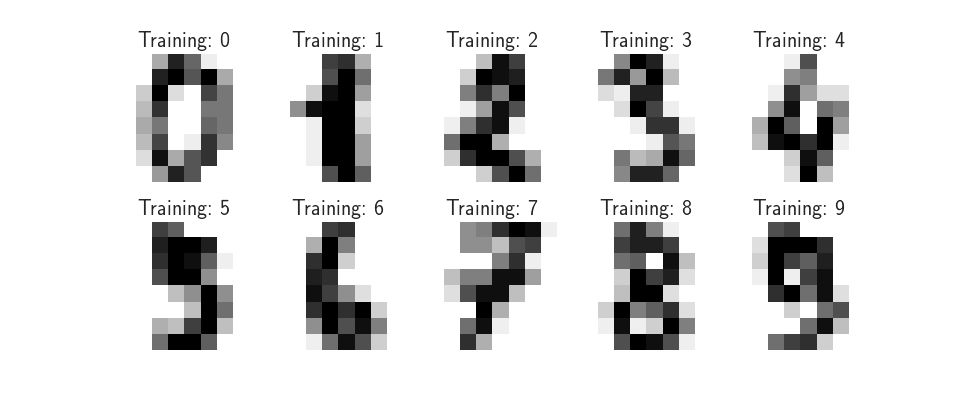

In [3]:
digits = datasets.load_digits()
images_and_labels = list(zip(digits.images, digits.target))
fig = plt.figure(figsize=(12, 5))
for index, (image, label) in enumerate(images_and_labels[:10]):
    plt.subplot(2, 5, index + 1)
    plt.axis('off')
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('Training: %i' % label)
plt.show()
my_saving_display(fig, dirname, "digits_plot", imageformat)

In [4]:
##############################################################################
# Limits on a simulated example
##############################################################################

scenario = 4
n_samples = 100
n_test = 30
if scenario == 3:
    # Example with 3 classes
    mean_0 = [0, 0]
    mean_1 = [1, 0]
    mean_2 = [0, 1]
    means = [mean_0, mean_1, mean_2]
    noise_level = 0.15
elif scenario == 4:
    # Example with 4 classes
    mean_0 = [0, 0]
    mean_1 = [1, 0]
    mean_2 = [0, 1]
    mean_3 = [0.5, 0.5]
    means = [mean_0, mean_1, mean_2, mean_3]
    noise_level = 0.10
elif scenario == 2:
    # Example with 4 classes
    mean_0 = [0, 0]
    mean_1 = [1, 1]
    noise_level = 0.10
    means = [mean_0, mean_1]

n_class = len(means)  # get the number of classes considered

X, y = data_blob_generation(n_samples, means, noise_level)
X_test, y_test = data_blob_generation(n_test, means, noise_level)

<IPython.core.display.Javascript object>


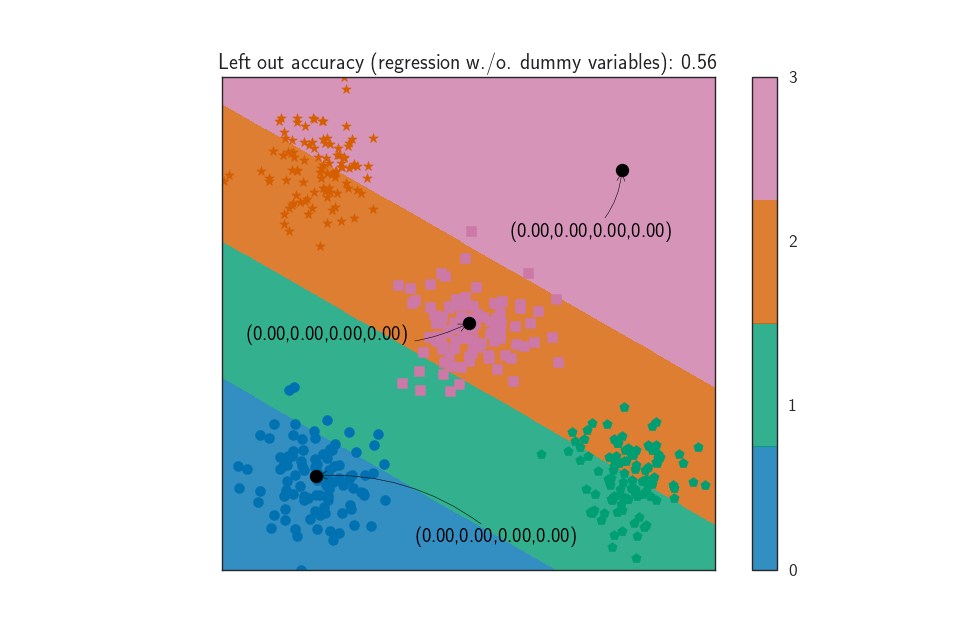

In [5]:
##############################################################################
# Naive linear regression on raw observations
##############################################################################

resolution_param = 500  # 500 for nice plotting, 50 for fast version

regr = LinearRegression()
regr.fit(X, y)
y_pred_test = class_round(regr.predict(X_test), n_class)

# Plotting part
fig0 = plt.figure(figsize=(12, 8))
title = "Left out accuracy (regression w./o. dummy variables)" + \
        ": {:.2f}".format(accuracy_score(y_test, y_pred_test))
plt.title(title)


def f(xx):
    """Classifier"""
    return class_round(regr.predict(xx.reshape(1, -1)), n_class)
frontiere(f, X, y, step=resolution_param)

# reshape needed for sklearn convention on point to predict evaluations
display1 = np.asarray([0, 0]).reshape(1, -1)
display2 = np.asarray([0.5, 0.5]).reshape(1, -1)
display3 = np.asarray([1, 1]).reshape(1, -1)

point_plot(fig0, display1, np.zeros(n_class), (90, -60), color_txt='black')
point_plot(fig0, display2, np.zeros(n_class), (-200, -15), color_txt='black')
point_plot(fig0, display3, np.zeros(n_class), (-100, -60), color_txt='black')

plt.show()
my_saving_display(fig0, dirname, 'RawRegression' + 'n_class' +
                  str(n_class), imageformat)

<IPython.core.display.Javascript object>


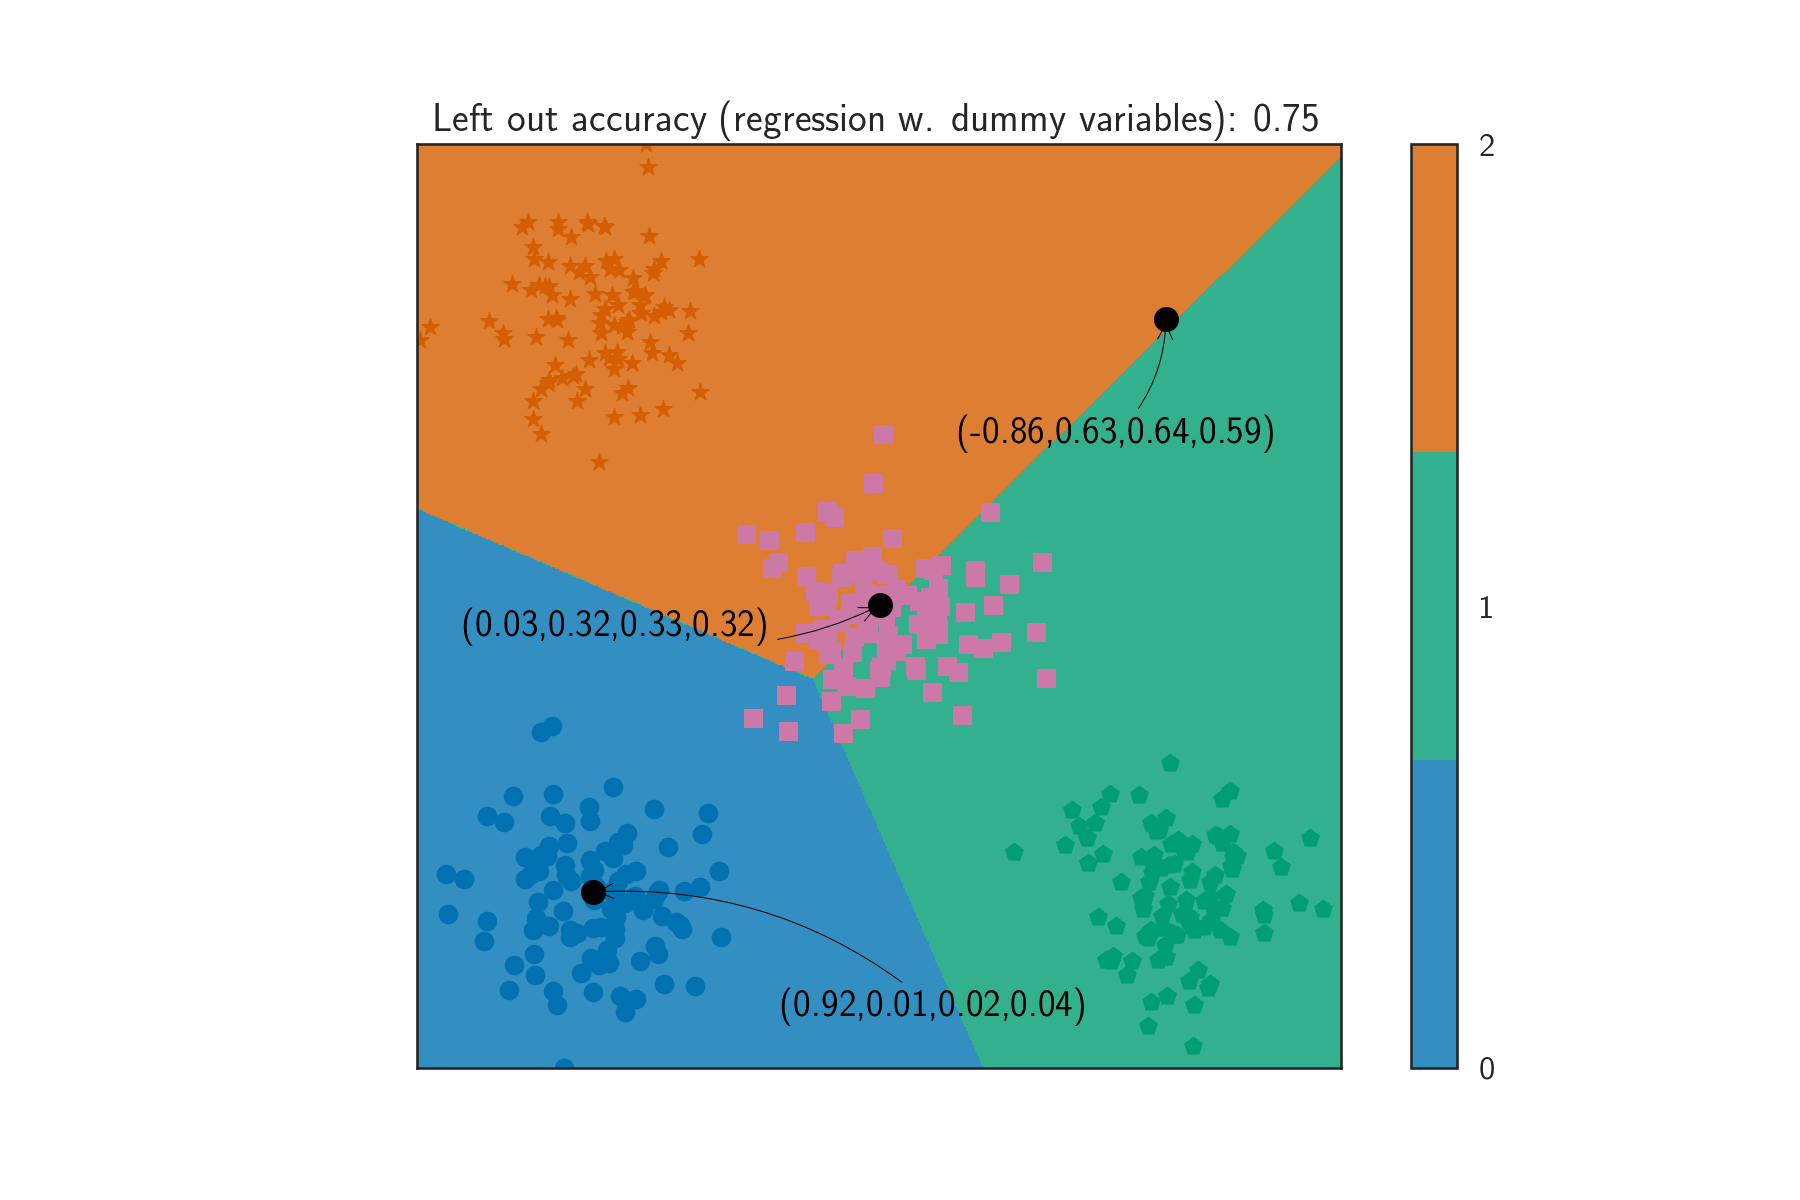

In [6]:
##############################################################################
# Naive linear regression on dummy variables
##############################################################################

# performing class estimation by performing multi-task learning with dummy
# variables
enc = OneHotEncoder()
enc.fit(y.reshape(-1, 1))
Y = enc.transform(y.reshape(-1, 1)).toarray()
regr_multi = LinearRegression()
regr_multi.fit(X, Y)
proba_vector_test = regr_multi.predict(X_test)
y_pred_test = class_round(regr.predict(X_test), n_class)

# performance evaluation on new dataset
y_pred_test = np.argmax(proba_vector_test, axis=1)
title = "Left out accuracy (regression w. dummy variables)" + \
        ": {:.2f}".format(accuracy_score(y_test, y_pred_test))

# Plotting part
fig1 = plt.figure(figsize=(12, 8))
plt.title(title)


def f(xx):
    """Classifier"""
    return np.argmax(regr_multi.predict(xx.reshape(1, -1)))
frontiere(f, X, y, step=resolution_param)

# naive method: estimate probability with linear model over indicators
proba_vector1 = regr_multi.predict(display1)
label_pred1 = np.argmax(proba_vector1)

proba_vector2 = regr_multi.predict(display2)
label_pred2 = np.argmax(proba_vector2)

proba_vector3 = regr_multi.predict(display3)
label_pred3 = np.argmax(proba_vector3)

point_plot(fig0, display1, proba_vector1[0], (90, -60), color_txt='black')
point_plot(fig0, display2, proba_vector2[0], (-200, -15), color_txt='black')
point_plot(fig0, display3, proba_vector3[0], (-100, -60), color_txt='black')

plt.show()
my_saving_display(fig1, dirname, 'DummyRegression' + 'n_class' +
                  str(n_class), imageformat)

<IPython.core.display.Javascript object>


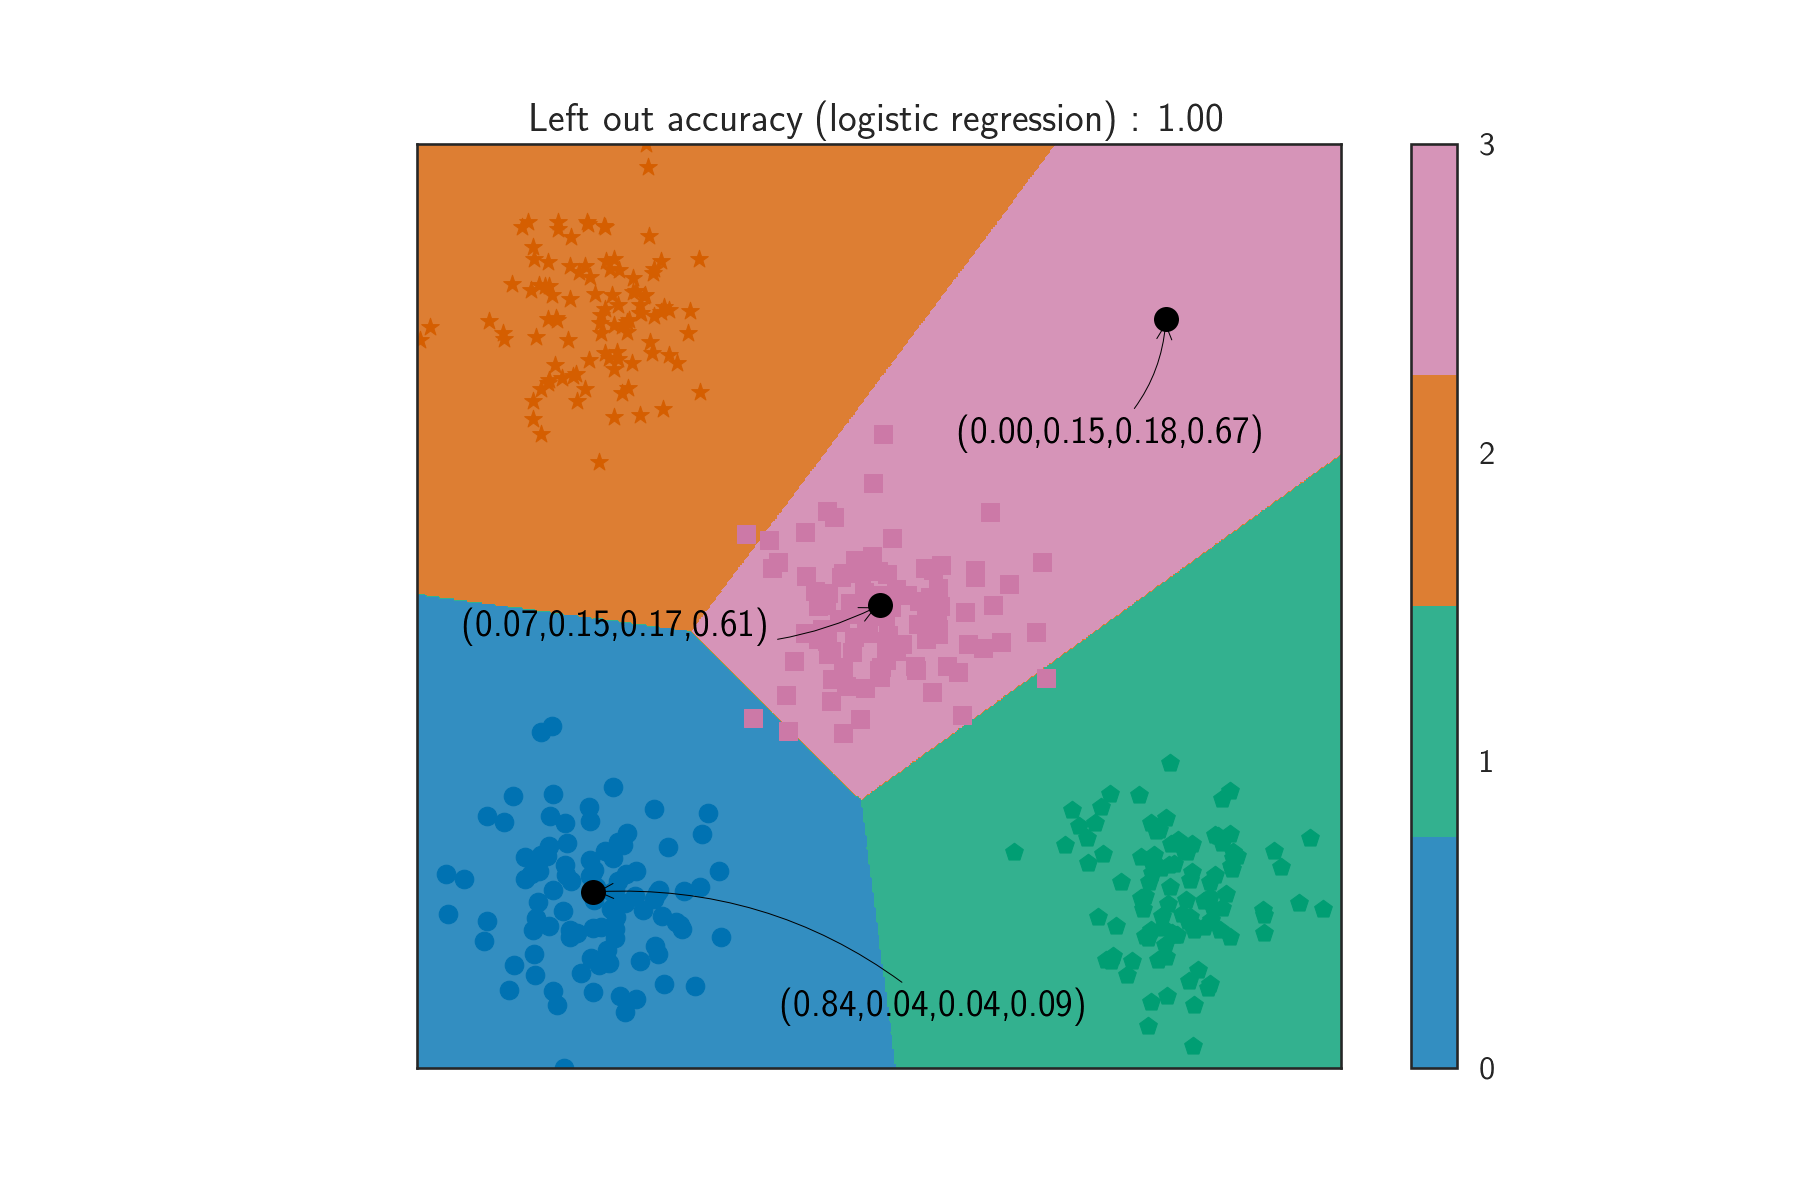

In [7]:
##############################################################################
# Logistic regression
##############################################################################

clf = LogisticRegression()
clf.fit(X, y)
y_logit_test = clf.predict(X_test)
title = "Left out accuracy (logistic regression) " + \
        ": {:.2f}".format(accuracy_score(y_test, y_logit_test))
fig2 = plt.figure(figsize=(12, 8))
plt.title(title)


def f(xx):
    """Classifier"""
    return int(clf.predict(xx.reshape(1, -1)))
frontiere(f, X, y, step=resolution_param)

proba_vector_logit1 = np.exp(clf.predict_log_proba(display1))[0]
proba_vector_logit2 = np.exp(clf.predict_log_proba(display2))[0]
proba_vector_logit3 = np.exp(clf.predict_log_proba(display3))[0]

point_plot(fig0, display1, proba_vector_logit1, (90, -60), color_txt='black')
point_plot(fig0, display2, proba_vector_logit2, (-200, -15), color_txt='black')
point_plot(fig0, display3, proba_vector_logit3, (-100, -60), color_txt='black')

plt.show()
my_saving_display(fig2, dirname, 'LogisticRegression' + 'n_class' +
                  str(n_class), imageformat)

<IPython.core.display.Javascript object>


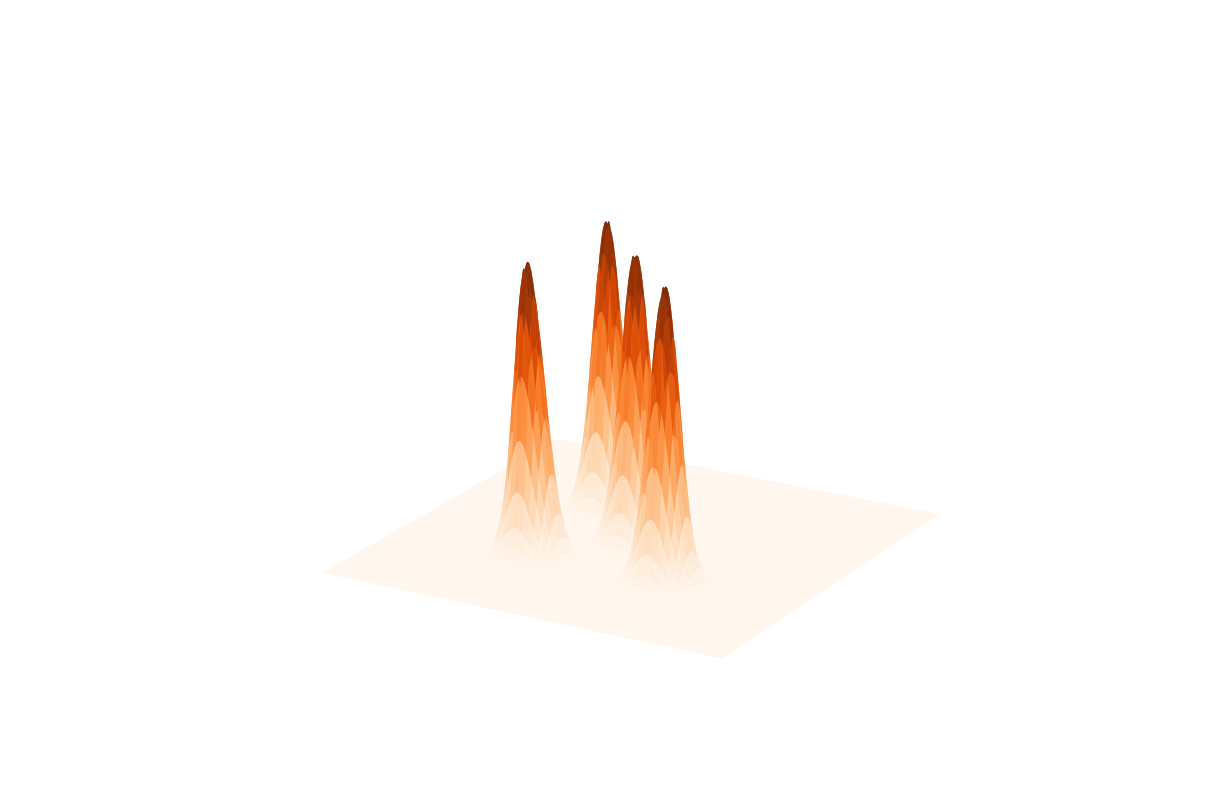

In [8]:
##############################################################################
# Plotting the underlying distribution: mixture of isotropic Gaussian
##############################################################################
step = 250

fig3 = pdf_3D_plot(means, n_class, noise_level, step)
my_saving_display(fig2, dirname, 'mixt_of_iso_gaussian' + 'n_class' +
                  str(n_class), imageformat)

<IPython.core.display.Javascript object>


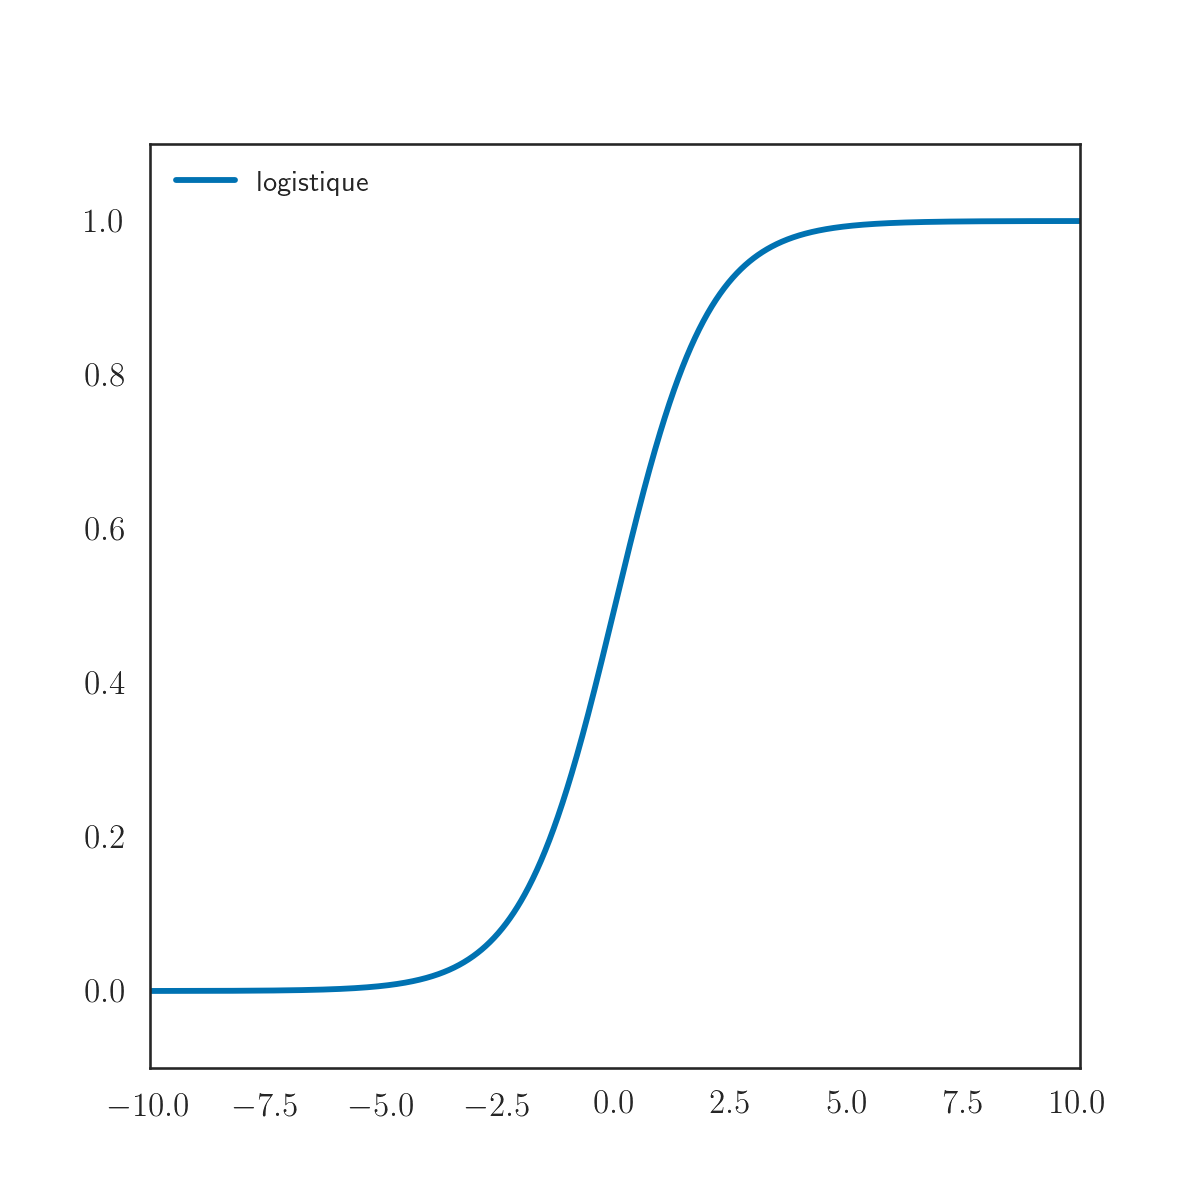

In [9]:
##############################################################################
# Plotting the logistic function
##############################################################################

t = np.arange(-10, 10, step=0.01)


def logistic(t):
    """logistic"""
    return np.exp(t) / (1 + np.exp(t))


fig0 = plt.figure(figsize=(8, 8))
ax1 = plt.subplot(111)
ax1.plot(t, logistic(t), label='logistique')

ax1.set_ylim(-0.1, 1.1)
ax1.set_xlim(-10, 10)
plt.legend(loc="upper left", fontsize=14)

plt.show()
my_saving_display(fig2, dirname, 'logistic', imageformat)